<center><h1>2-2 데이터 전처리</h1></center>

<h3> 사전 준비 </h3>

1. 데이터 리스트
    - http://bit.ly/bream_smelt
    

2. 사용할 ML 패키지 : 사이킷 런 설치<br>
pip install scikit-learn<br>

3. K-최근접 이웃(K-Nearest Neighbor) 이란?<br>
사이킷런 패키지의 K-최근접 이웃 알고리즘은 어떤 데이터에 대한 대답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용함

In [45]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [46]:
# numpy, 대표적인 배열 라이브러리
import numpy as np 

# column_stack() 함수는 전달받은 리스트를 일렬로 세운 다음 차례로 연결 합니다 
fish_data = np.column_stack((fish_length, fish_weight)) 
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [47]:
# concatenate() 함수는 두 리스트를 연결합니다
# ones(), zeros() 함수는 각각 원하는 개수의 1과 0을 채운 배열을 만듭니다
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [48]:
# train_test_split() 배열을  비율에 맞게 훈련 세트와 테스트 세트로 나누어 줍니다
from sklearn.model_selection import train_test_split
# random_state 매개변수는 random seed 와 같은 기능입니다
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
# 기본적으로 25% 테스트 세트로 만듬
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [49]:
# statify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target,random_state=42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


<h3> 수상한 도미 한마리 </h3>

In [50]:
# 파이썬에서 모듈 전체를 임포트 하지 않고 특정 클래스만 임포트 하려면 from ~ import 구문 사용
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [51]:
# 수상한 도미 예측 테스트
print(kn.predict([[25,150]]))

[0.]


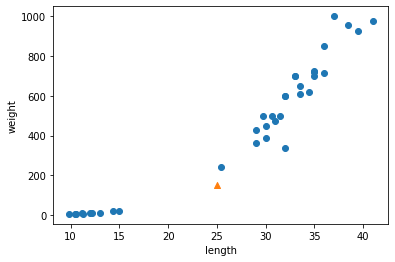

In [52]:
# matplotlib 의 pylot 함수를 plt로 줄여서 사용
import matplotlib.pyplot as plt 

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker='^') #marker 매개변수는 모양을 지정합니다
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

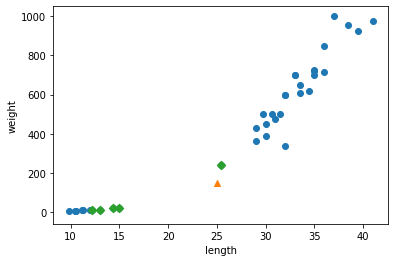

In [53]:
# kneighbors() 주어진 샘플에서 가장 가까운 이웃을 찾아줍니다, 이웃까지 거리와, 이웃 샘플의 인덱스를 반환 합니다
distances, indexes = kn.kneighbors([[25,150]])

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker='^') #marker 매개변수는 모양을 지정합니다
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # D는 마름모로 그려줍니다
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [54]:
print(train_input[indexes])
print(train_target[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]


In [55]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


<h3> 기준을 맞춰라 </h3><br>

y축으로 조금만 멀리 떨어져도 거리가 아주 큰 값으로 계산되는 이유?<br>
x축은 범위가 좁고(0~40), y축은 범위가 넓기 때문(0~1000)

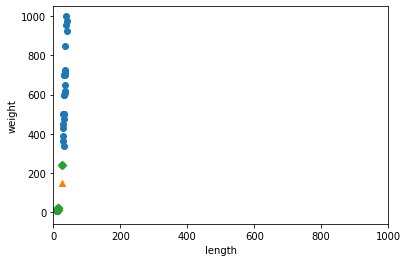

In [56]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim((0,1000)) # x축의 범위를 지정하려면 xlim() 함수를 사용합니다
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

6. 스케일(scale)? 두 특성(길이와 무게)의 값이 놓인 범위가 매우 다릅니다. 이르 두 특성의 스케일이 다르다고도 합니다.

7. 데이터 전처리(data preprocessing)? 샘플 간의 거리에 영향을 많이 받을 경우, 제대로 사용하려면 특성값을 일정한 기준으로 맞춰 주어야 합니다. 이러한 작업을 데이터 전처리 라고 함

8. 표준점수(standard score, 혹은 z점수)? 표준 점수는 각 특성의 갑이 0에서 표준편차에 몇 배만큼 떨어져 있는지를 나타냅니다.

9. 표준편차 ? 분산은 데이터에서 평균값을 뺀 값을 모두 제곱한 다음 평균을 내어 구합니다. 표준편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타냅니다. 표준점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값입니다.
    
10. 브로드캐스팅(broadcasting) ? tran_scaled 넘파이 수식처럼, 넘파이는 똑똑하게도 train_input의 모든 행에서 mean 평균 값을 빼주고 표준 편차 std 로 나눠줍니다.

In [57]:
# 표준점수를 구하는 방법은, 평균을 빼고 표준 편차로 나누면 됨
# 평균, axis=0 는 특성마다 갑의 스케일이 다르므로, 각 특성별로 계산해야 함을 뜻함
mean = np.mean(train_input, axis=0) 
# 표준편차, axis=0 는 특성마다 갑의 스케일이 다르므로, 각 특성별로 계산해야 함을 뜻함
std = np.std(train_input, axis=0)
# 브로드 캐스팅
train_scaled = (train_input - mean) / std 

<h3>전처리 데이터로 모델 훈련하기</h3>

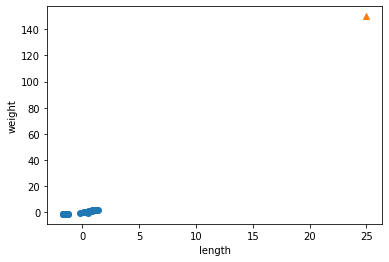

In [58]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

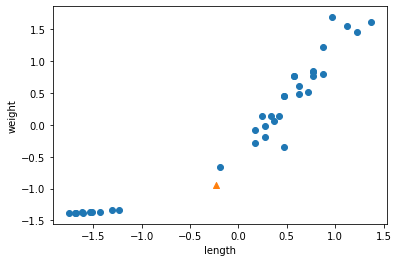

In [59]:
# 샘플 데이터도 전처리가 필요함
new = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [60]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
# 테스트 데이터도 전처리가 필요함
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [62]:
print(kn.predict([new]))

[1.]


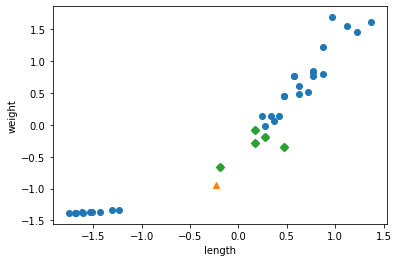

In [63]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()